<a href="https://colab.research.google.com/github/vinayshanbhag/wilco_property_values/blob/main/2022_wilco_prop_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns
from scipy import stats
from datetime import datetime
%matplotlib inline

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/vinayshanbhag/wilco_property_values/main/2022_property_assessments.csv")
df['tooltip'] = df[['quickrefid_x','situsstreetnumber',
       'situsstreetname', 'situsstreetsuffix']].apply(lambda x: f"({x[0]}) {x[1]} {x[2]} {x[3]}", axis=1)

A simple linear regression model of assessed home values as a function of living area. Values far above the fit line are yellow and those far below are dark blue

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



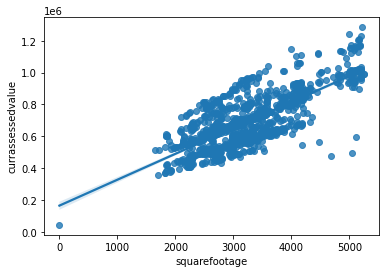

In [42]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.squarefootage,df.currassessedvalue)
line = slope*df.squarefootage+intercept

rg=sns.regplot(df.squarefootage,df.currassessedvalue);
X=rg.get_lines()[0].get_xdata();# x-coordinate of points along the regression line
Y=rg.get_lines()[0].get_ydata();# y-coordinate
P=rg.get_children()[1].get_paths();#The list of Path(s) bounding the shape of 95% confidence interval-transparent
err = df.currassessedvalue-np.interp(df.squarefootage, X, Y);

In [43]:
# Create a trace
trace = go.Scatter(
    x = df.squarefootage,
    y = df.currassessedvalue,
    mode = 'markers',
    text=df['tooltip'],
    marker= dict(size= 5,
                    line= dict(width=0.5),
                    color= err,
                    colorscale='Viridis',
                    opacity= 0.7,
                    showscale=True
                   )
)
trace2 = go.Scatter(
                  x=df.squarefootage,
                  y=line,
                  mode='lines',
                  marker=go.scatter.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

data = [trace,trace2]
layout= go.Layout(
    title= f'2022 Assessed Values', #datetime.now().strftime("(Updated %m/%d %H:%M)"),
    hovermode= 'closest',
    xaxis= dict(
        title= 'Living area (Sqft)',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Assessed Value',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)


p_codes={1:'M', 2: 'L', 79: 'Z'}#dict to get the Plotly codes for commands to define the svg path
path=''
for s in P[0].iter_segments():
    c=p_codes[s[1]]
    xx, yy=s[0]
    path+=c+str('{:.5f}'.format(xx))+' '+str('{:.5f}'.format(yy))

shapes=[dict(type='path',
             path=path,
             line=dict(width=0.3,color='rgba(68, 122, 219, 0.25)' ),
             fillcolor='rgba(68, 122, 219, 0.25)')]   
layout['shapes']=shapes
fig= go.Figure(data=data, layout=layout)
iplot(fig)

A simple linear regression model of market values of home in this dataset as a function of living area. Values far above the fit line are yellow and those far below are dark blue

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



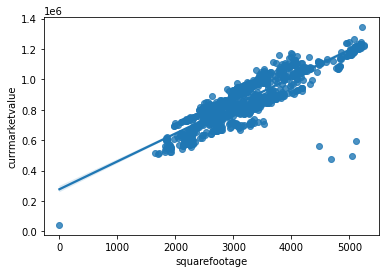

In [44]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.squarefootage,df.currmarketvalue)
line = slope*df.squarefootage+intercept

rg=sns.regplot(df.squarefootage,df.currmarketvalue);
X=rg.get_lines()[0].get_xdata()# x-coordinate of points along the regression line
Y=rg.get_lines()[0].get_ydata()# y-coordinate
P=rg.get_children()[1].get_paths()#The list of Path(s) bounding the shape of 95% confidence interval-transparent
err = df.currmarketvalue-np.interp(df.squarefootage, X, Y)

In [45]:
# Create a trace
trace = go.Scatter(
    x = df.squarefootage,
    y = df.currmarketvalue,
    mode = 'markers',
    text=df['tooltip'],
    marker= dict(size= 5,
                    line= dict(width=0.5),
                    color= err,
                    colorscale='Viridis',
                    opacity= 0.7,
                    showscale=True
                   )
)
trace2 = go.Scatter(
                  x=df.squarefootage,
                  y=line,
                  mode='lines',
                  marker=go.scatter.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

data = [trace,trace2]
layout= go.Layout(
    title= '2022 Market Values',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Sqft',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Market Value',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)


p_codes={1:'M', 2: 'L', 79: 'Z'}#dict to get the Plotly codes for commands to define the svg path
path=''
for s in P[0].iter_segments():
    c=p_codes[s[1]]
    xx, yy=s[0]
    path+=c+str('{:.5f}'.format(xx))+' '+str('{:.5f}'.format(yy))

shapes=[dict(type='path',
             path=path,
             line=dict(width=0.3,color='rgba(68, 122, 219, 0.25)' ),
             fillcolor='rgba(68, 122, 219, 0.25)')]   
layout['shapes']=shapes
fig= go.Figure(data=data, layout=layout)
iplot(fig)

Change in market values 2021(gray) vs 2022 (blue)

In [46]:
trace = go.Scatter(
    x = df.squarefootage,
    y = df.currmarketvalue,
    mode = 'markers',
    text=df['tooltip'],
    marker= dict(size= 5,
                    line= dict(width=0.5),
                    color= 'rgb(31, 119, 180)',
                    opacity= 0.7,
                    showscale=False
                   )
)
trace2 = go.Scatter(
    x = df.squarefootage,
    y = df.marketvalue,
    mode = 'markers',
    text=df['tooltip'],
    marker= dict(size= 3,
                    line= dict(width=0.5),
                    color= 'gray',
                    opacity= 0.7,
                    showscale=False
                   )
)

data = [trace,trace2]
layout= go.Layout(
    title= 'YoY change in Market Values',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Sqft',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Assessed Values YOY',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)


fig= go.Figure(data=data, layout=layout)
iplot(fig)